## House Price Prediction using Linear, Ridge and Lasso Regression
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
 
The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation




# 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# reading the dataset
data = pd.read_csv("train.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
nacols=[col for col in data.columns if data[col].isnull().any()]

In [5]:
data[nacols].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- 75 percentile of house does not have EnclosedPorch, 3SsnPorch,ScreenPorch,PoolArea,miscellaneous feature
- 50 percentile of house does not have MasVnrArea,WoodDeckSF
- 25 percentile of house does not have BsmtFinSF1

## 1.1 Visualizing Categorical variables

In [7]:
data_str = data.select_dtypes(include=['object'])

In [8]:
data_str.shape[1]

43

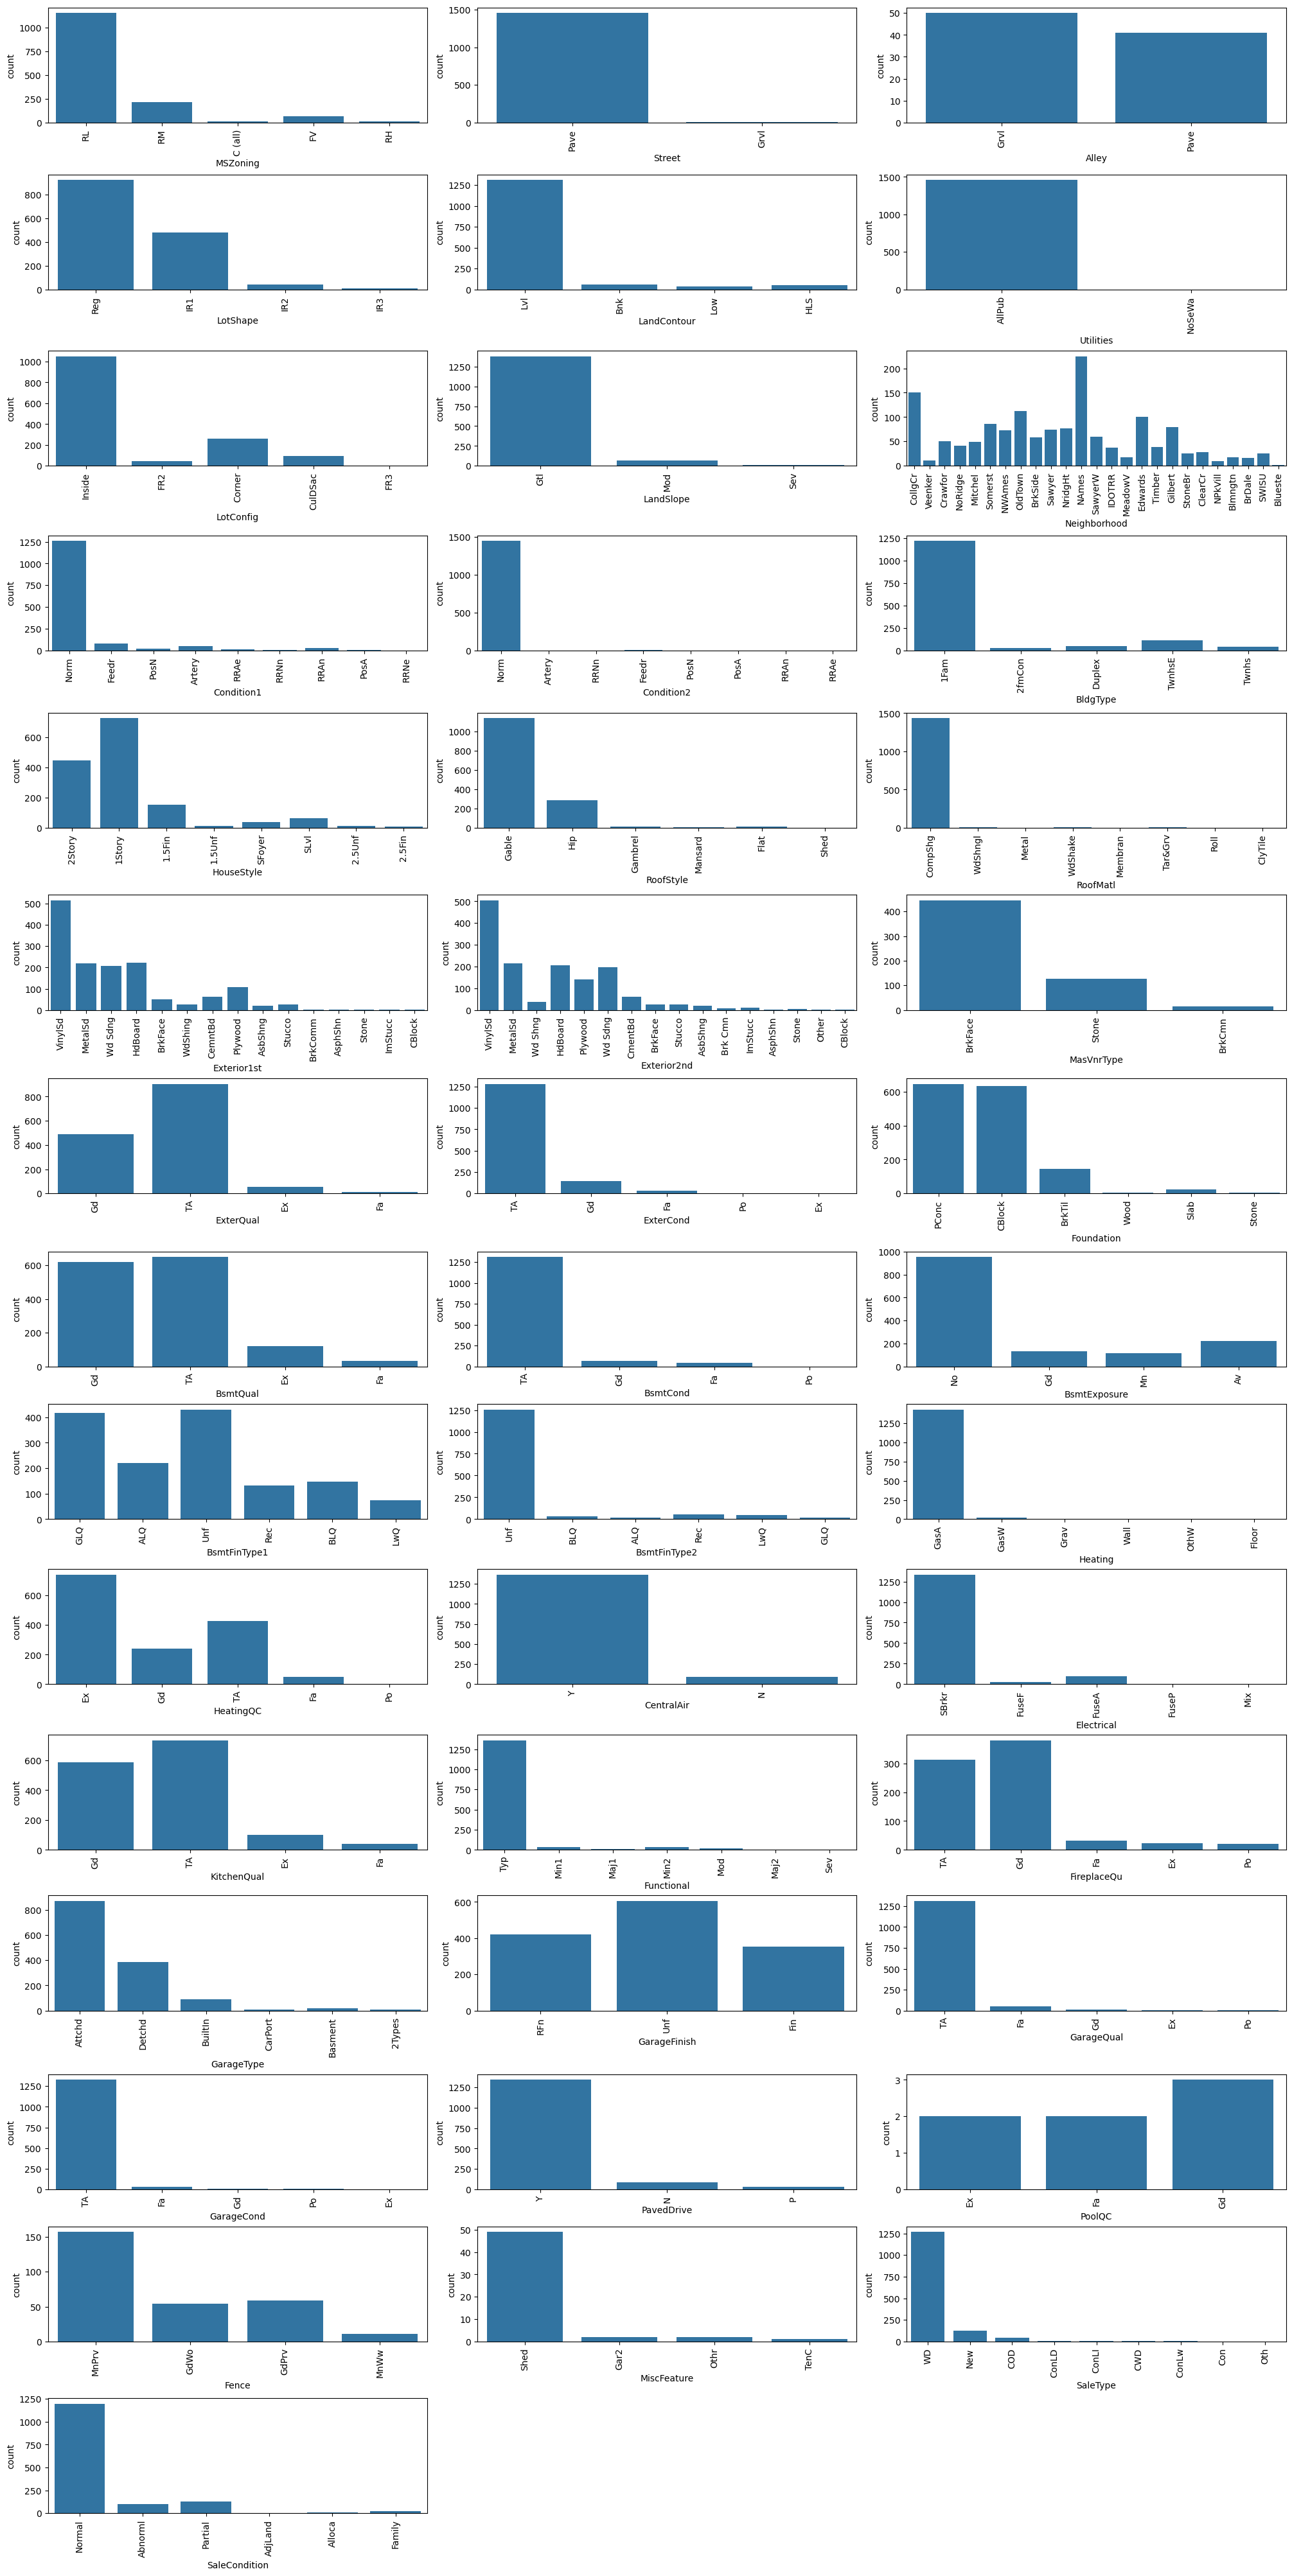

In [9]:
plt.figure(figsize=(20,40),layout='constrained')
i=1
colcount=3
for col in data_str:
    plt.subplot(math.ceil(data_str.shape[1]/colcount),colcount,i)
    a=sns.countplot(x = col, data = data_str)
    a.set_xticklabels(a.get_xticklabels(), rotation=90)
    i=i+1


## 1.2 Visualizing Numerical variables

In [10]:
# all numeric (float and int) variables in the dataset
data_numeric = data.select_dtypes(include=['float64', 'int64'])


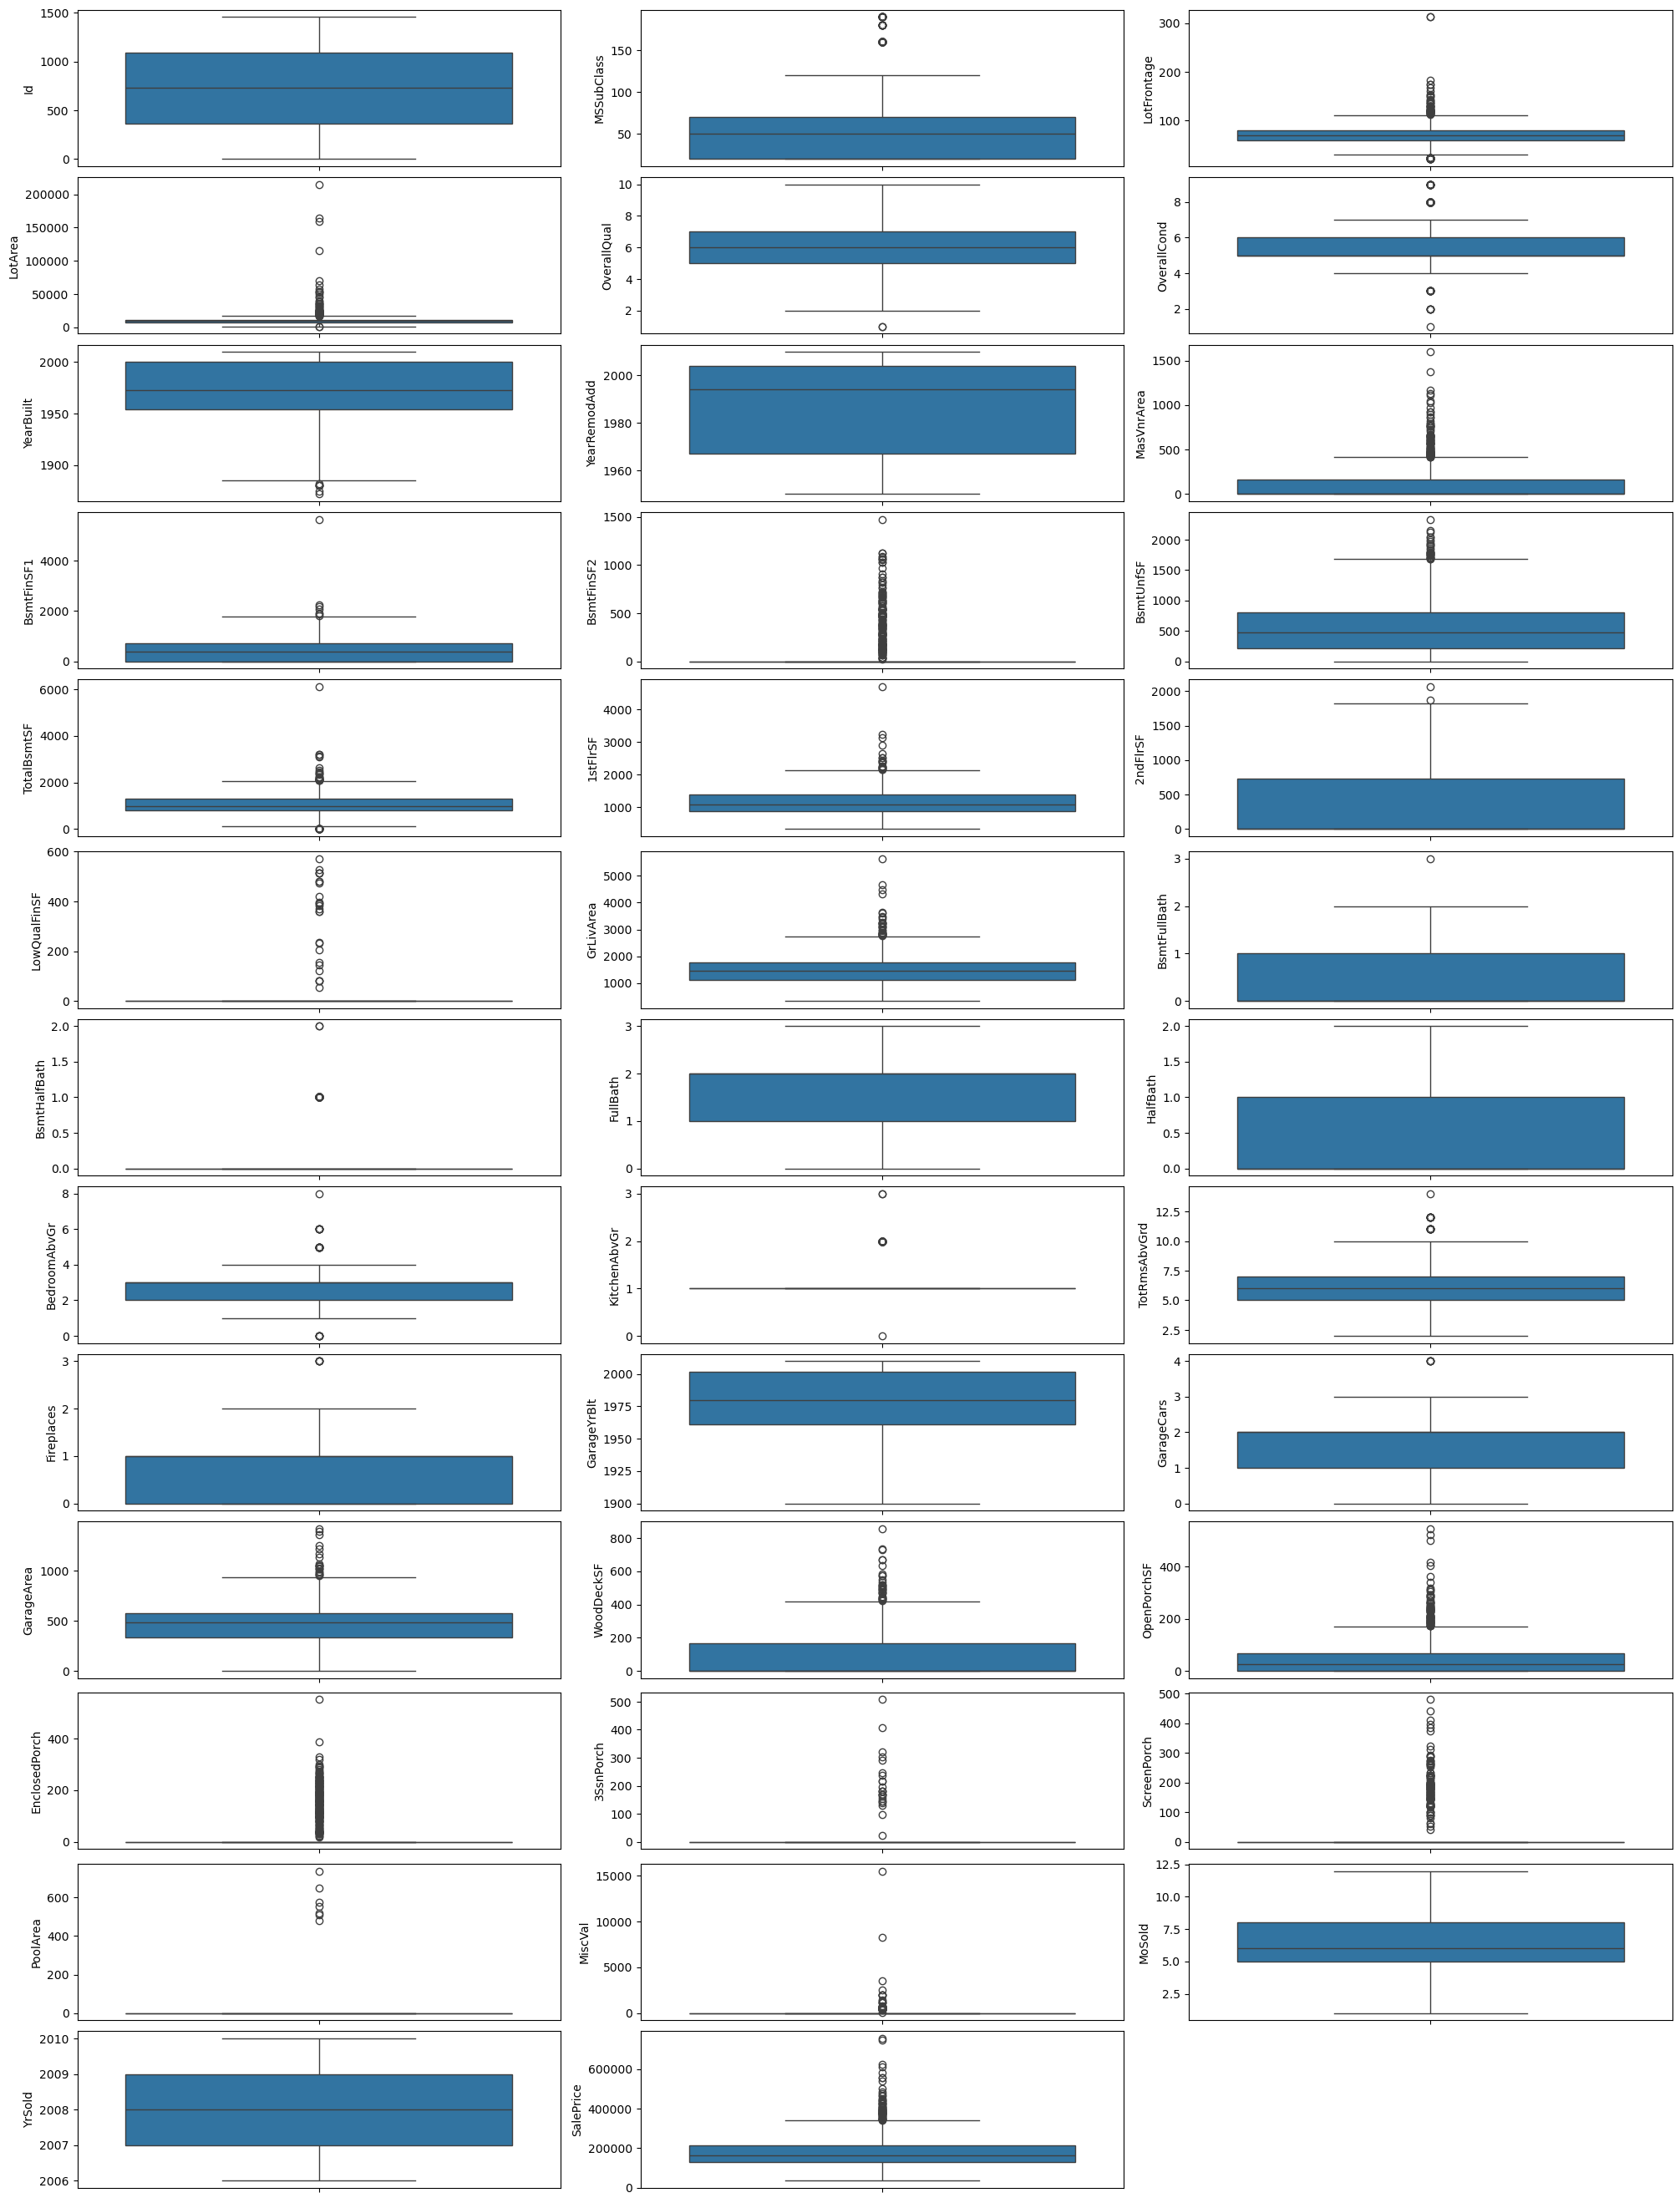

In [11]:
plt.figure(figsize=(20,30),layout='constrained')
i=1
for col in data_numeric:
    plt.subplot(math.ceil(data_str.shape[1]/colcount),colcount,i)
    sns.boxplot(y = col, data = data_numeric)
    i=i+1


# 2. Data Cleaning


## 2.1 Null value treatment

In [12]:
data[nacols].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [13]:
transformed=data.copy()


In [14]:
transformed["MiscFeature"].fillna(value='No Misc Feature',inplace=True)

In [15]:
transformed[nacols].isna().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature        0
dtype: int64

In [16]:
transformed["Fence"].fillna(value='No Fence',inplace=True)
transformed["PoolQC"].fillna(value='No Pool',inplace=True)
transformed["GarageCond"].fillna(value='No Garage',inplace=True) 
transformed["GarageQual"].fillna(value='No Garage',inplace=True)
transformed["GarageFinish"].fillna(value='No Garage',inplace=True)
transformed["GarageType"].fillna(value='No Garage',inplace=True)
transformed["FireplaceQu"].fillna(value='No Fireplace',inplace=True)
transformed["BsmtFinType2"].fillna(value='No Basement',inplace=True)
transformed["BsmtFinType1"].fillna(value='No Basement',inplace=True)
transformed["BsmtCond"].fillna(value='No Basement',inplace=True)
transformed["BsmtQual"].fillna(value='No Basement',inplace=True)
transformed["BsmtExposure"].fillna(value='No Basement',inplace=True)
transformed["Alley"].fillna(value='AlleyNone',inplace=True) 

In [17]:
transformed[nacols].isna().sum()

LotFrontage     259
Alley             0
MasVnrType      872
MasVnrArea        8
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
Electrical        1
FireplaceQu       0
GarageType        0
GarageYrBlt      81
GarageFinish      0
GarageQual        0
GarageCond        0
PoolQC            0
Fence             0
MiscFeature       0
dtype: int64

In [18]:
transformed['GarageYrBlt'].value_counts()

GarageYrBlt
2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: count, Length: 97, dtype: int64

In [19]:
transformed["GarageYrBlt"].fillna(value=0.0,inplace=True)

In [20]:
transformed[nacols].isna().sum()

LotFrontage     259
Alley             0
MasVnrType      872
MasVnrArea        8
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
Electrical        1
FireplaceQu       0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageQual        0
GarageCond        0
PoolQC            0
Fence             0
MiscFeature       0
dtype: int64

In [21]:
transformed[nacols].isna().sum()

LotFrontage     259
Alley             0
MasVnrType      872
MasVnrArea        8
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
Electrical        1
FireplaceQu       0
GarageType        0
GarageYrBlt       0
GarageFinish      0
GarageQual        0
GarageCond        0
PoolQC            0
Fence             0
MiscFeature       0
dtype: int64

<Axes: xlabel='Electrical', ylabel='count'>

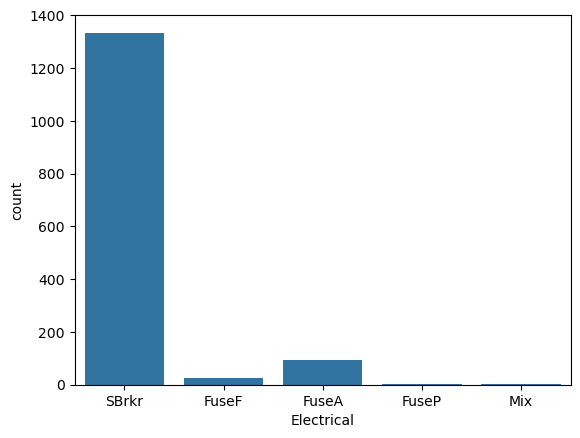

In [22]:
sns.countplot(data,x="Electrical") 

In [23]:
transformed["Electrical"].fillna(value='SBrkr',inplace=True)

<Axes: xlabel='MasVnrArea'>

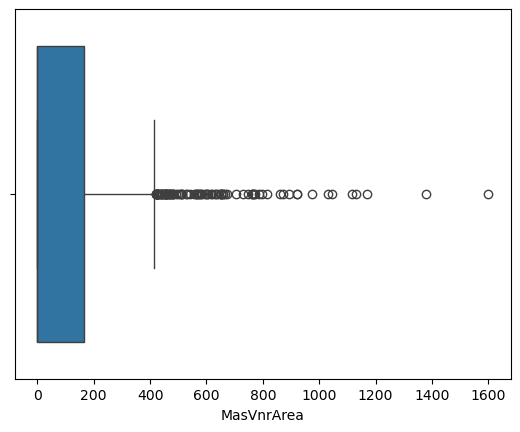

In [24]:
sns.boxplot(data,x="MasVnrArea") 

<Axes: xlabel='MasVnrType', ylabel='count'>

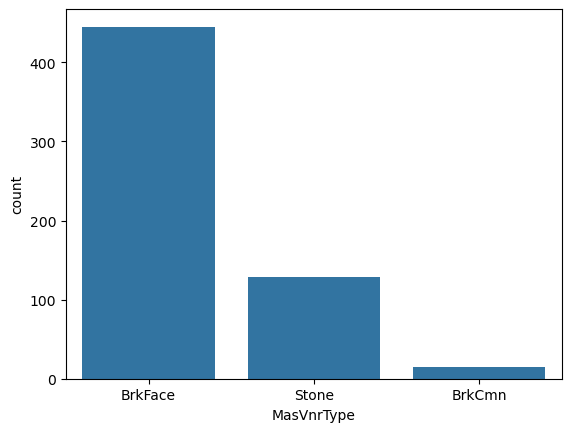

In [25]:
sns.countplot(data,x="MasVnrType") 

In [26]:
transformed.loc[(transformed["MasVnrType"].isna()==True) & (transformed["MasVnrArea"]>0),"MasVnrType"]='BrkFace'

In [27]:
transformed["MasVnrType"].fillna(value='MasVnrTypeNone',inplace=True)
transformed["MasVnrArea"].fillna(value=0,inplace=True)


<Axes: xlabel='LotFrontage'>

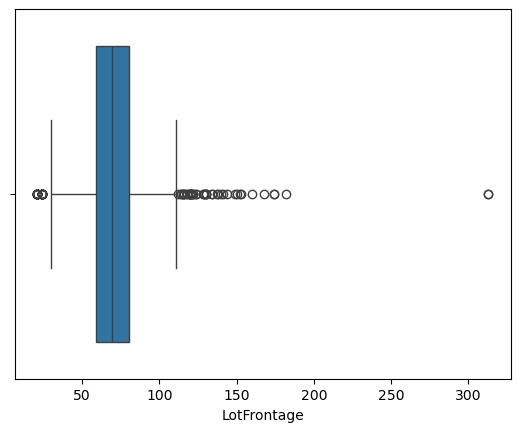

In [28]:
sns.boxplot(data,x="LotFrontage")  

In [29]:
transformed["LotFrontage"].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [30]:
transformed["LotFrontage"].fillna(value=70,inplace=True)

In [31]:
transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 2.2 Creating derived columns

In [32]:
#create cols for age,remodage and garageage
transformed["LotAge"]=transformed["YrSold"]-transformed["YearBuilt"]
transformed["LotRemodAge"]=transformed["YrSold"]-transformed["YearRemodAdd"]
transformed["GarageAge"]=transformed["YrSold"]-transformed["GarageYrBlt"]
transformed.drop(["YrSold","YearBuilt","YearRemodAdd",'GarageYrBlt'],axis=1,inplace=True)

## 2.3 Coverting column datatypes

In [33]:
#Covert columns to str if they have number but actually have category
transformed[['MSSubClass','OverallQual','OverallCond']]=transformed[['MSSubClass','OverallQual','OverallCond']].map(str)

## 2.4 Outlier treatment

In [34]:
transformed_numeric=transformed.select_dtypes(include=['float64', 'int64'])

In [35]:
for col in transformed_numeric:
    transformed[col][transformed[col] <= transformed[col].quantile(0.05)] = transformed[col].quantile(0.05)
    transformed[col][transformed[col] >= transformed[col].quantile(0.95)] = transformed[col].quantile(0.95)

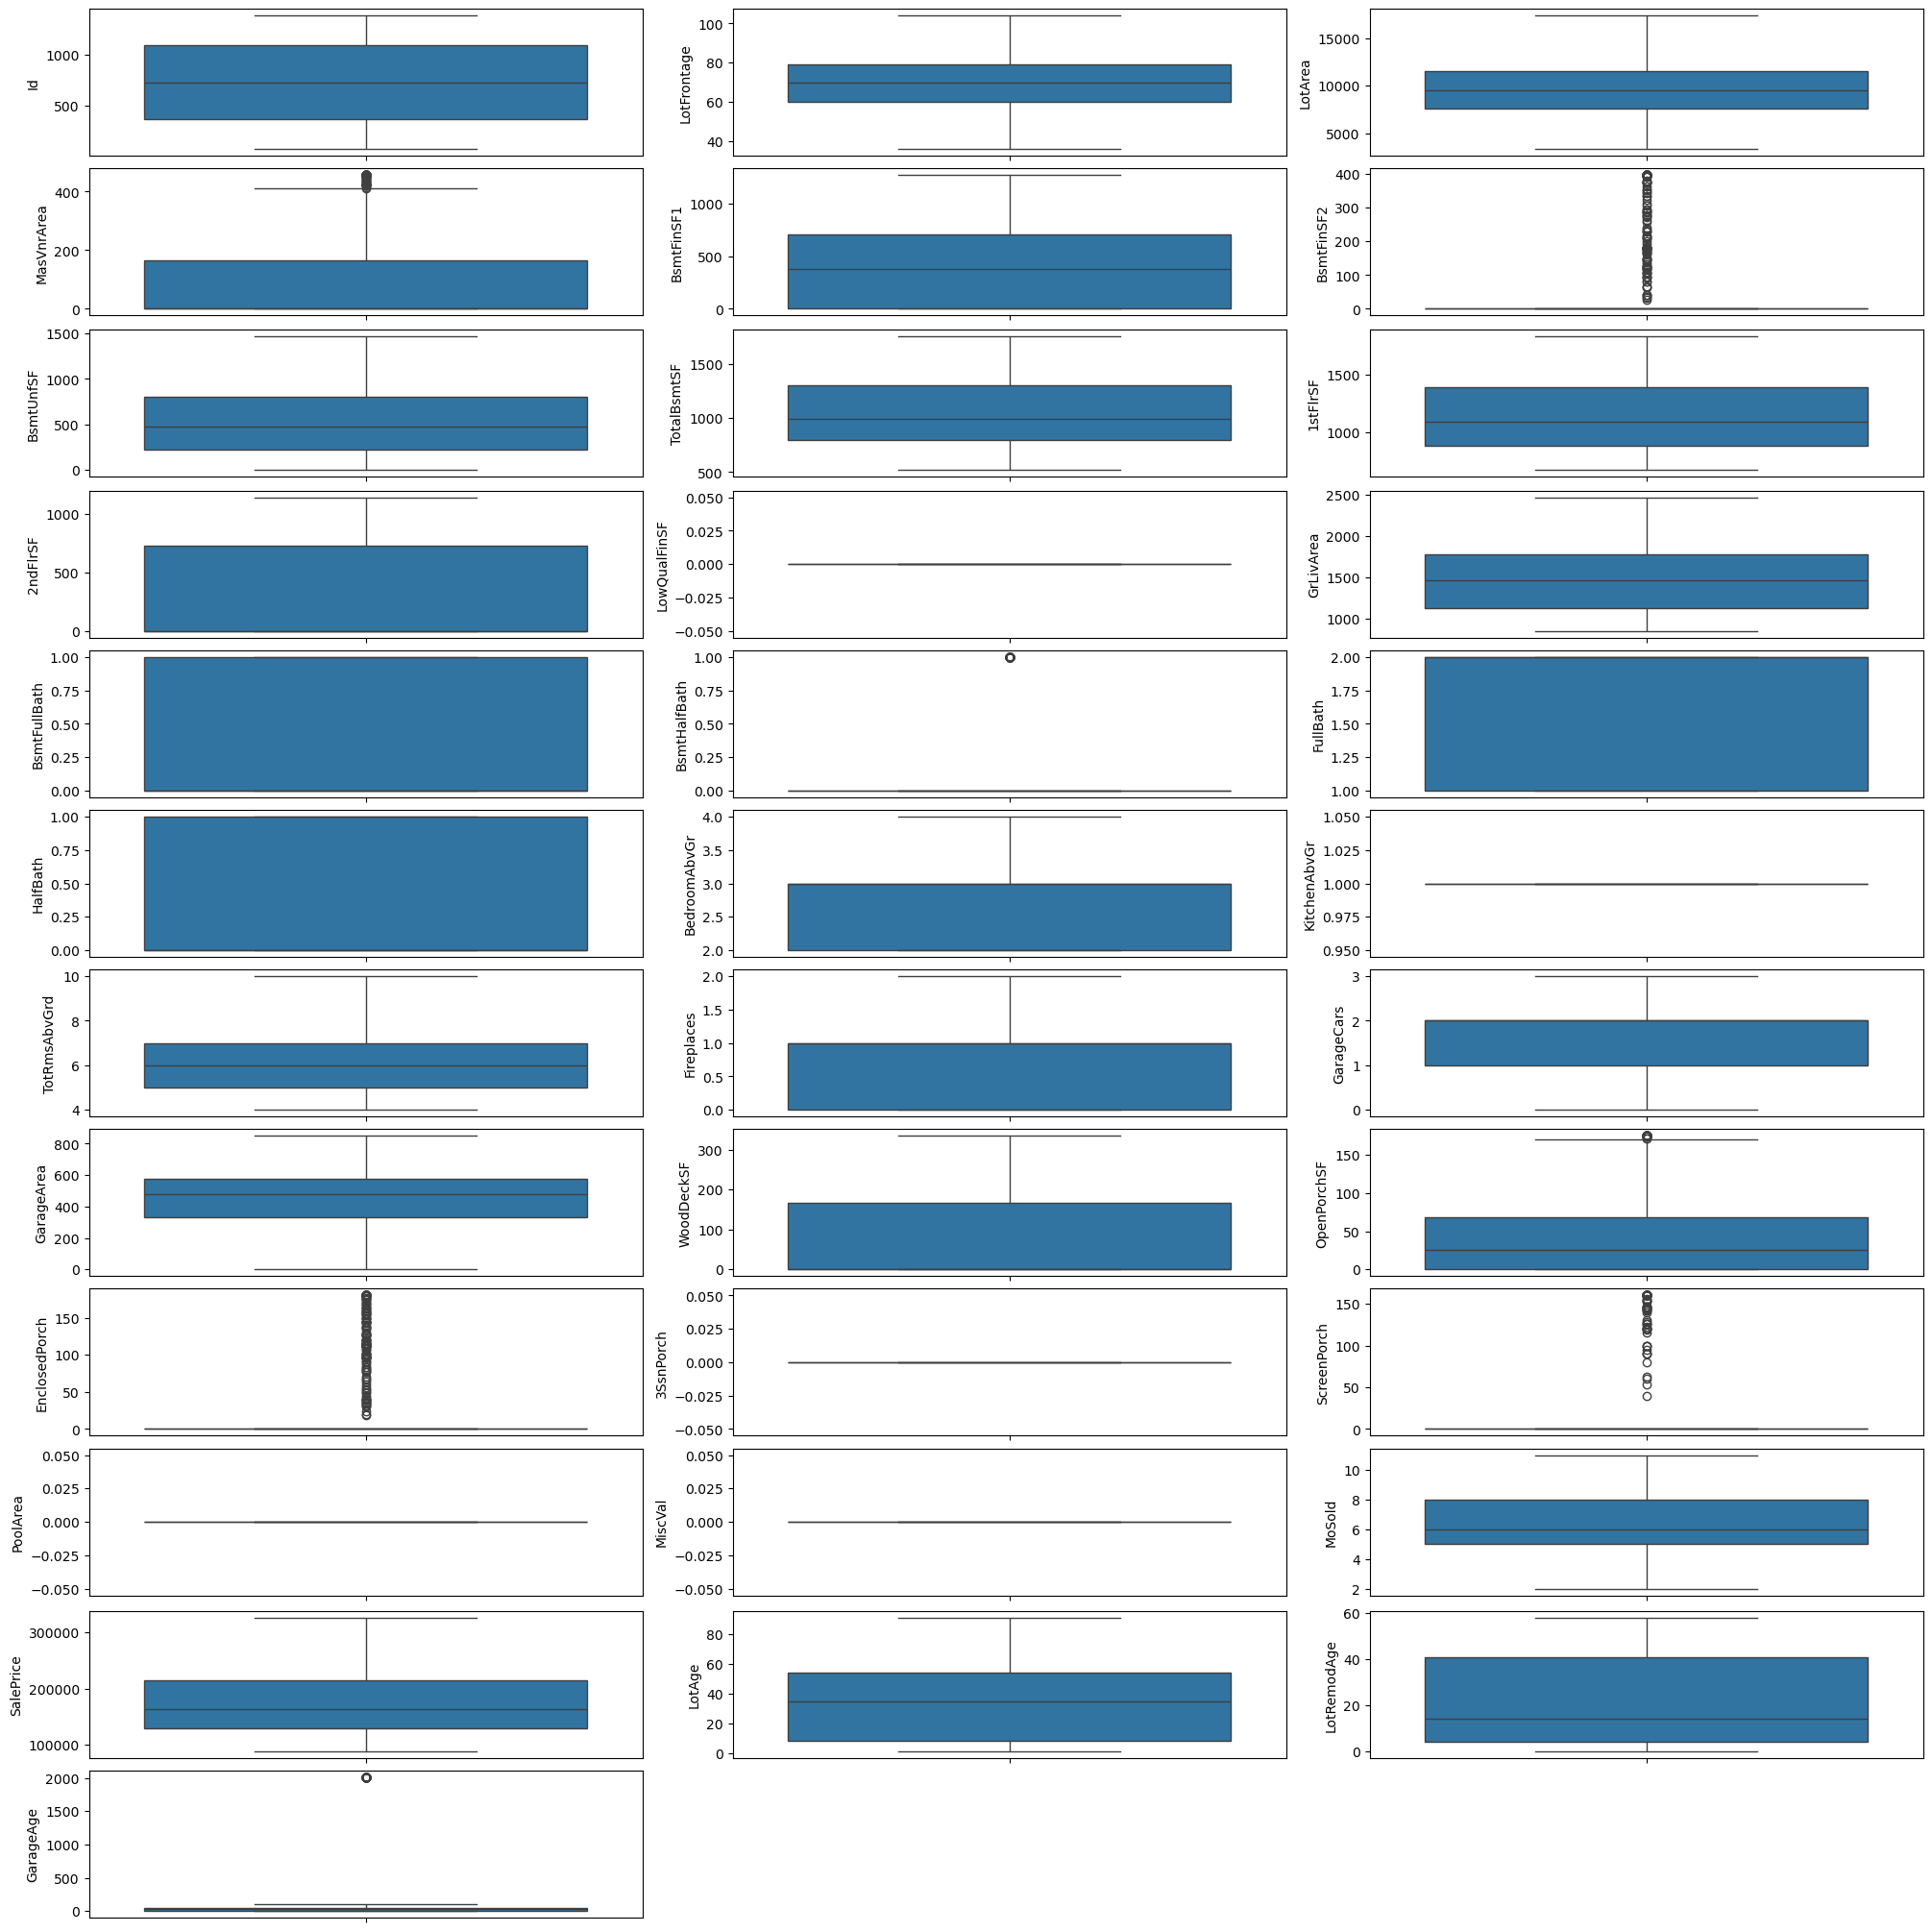

In [36]:
plt.figure(figsize=(20,20),layout='constrained')
i=1
for col in transformed_numeric:
    plt.subplot(math.ceil(transformed_numeric.shape[1]/colcount),colcount,i)
    sns.boxplot(y = col, data = transformed)    
    i=i+1


# 3. Understanding relation of target vairable with features

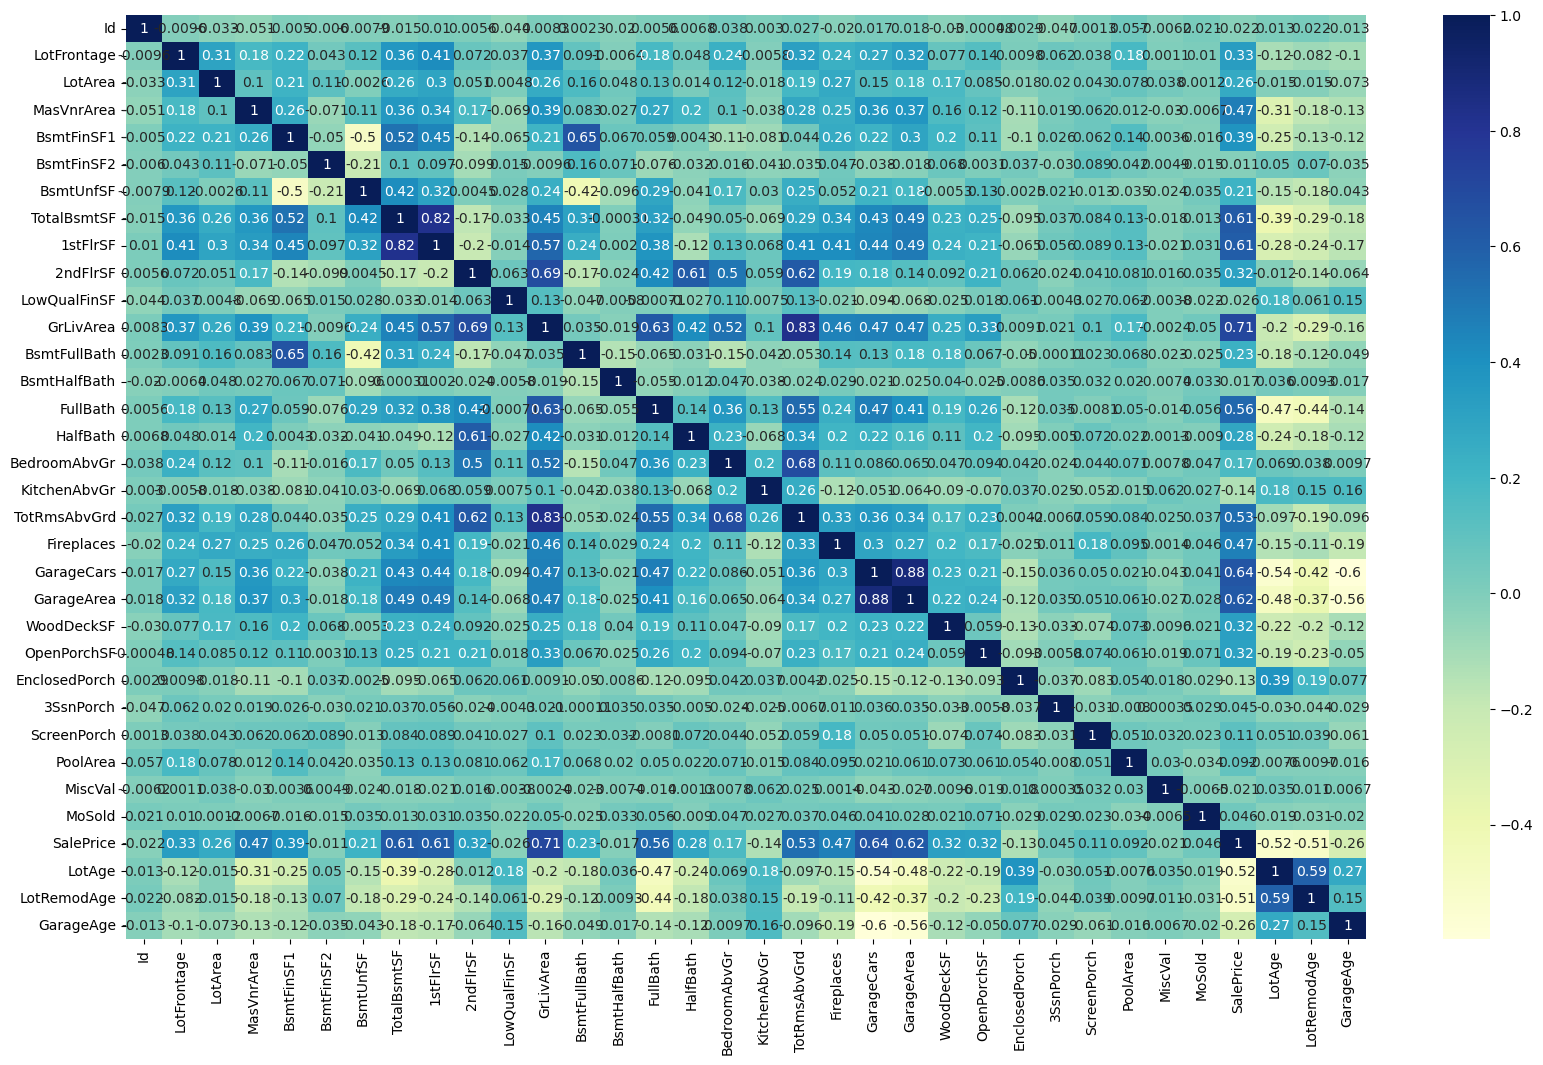

In [37]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(20,12))

# heatmap
sns.heatmap(transformed_numeric.corr(), cmap="YlGnBu", annot=True)
plt.show()


- OverallQual,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotalRmsAbvGrd,GarageCars,GarageArea,MasVnrArea,Fireplaces have +tive corr with sale price

- LotAge,LotRemodAge have similar negative corr with Sale Price

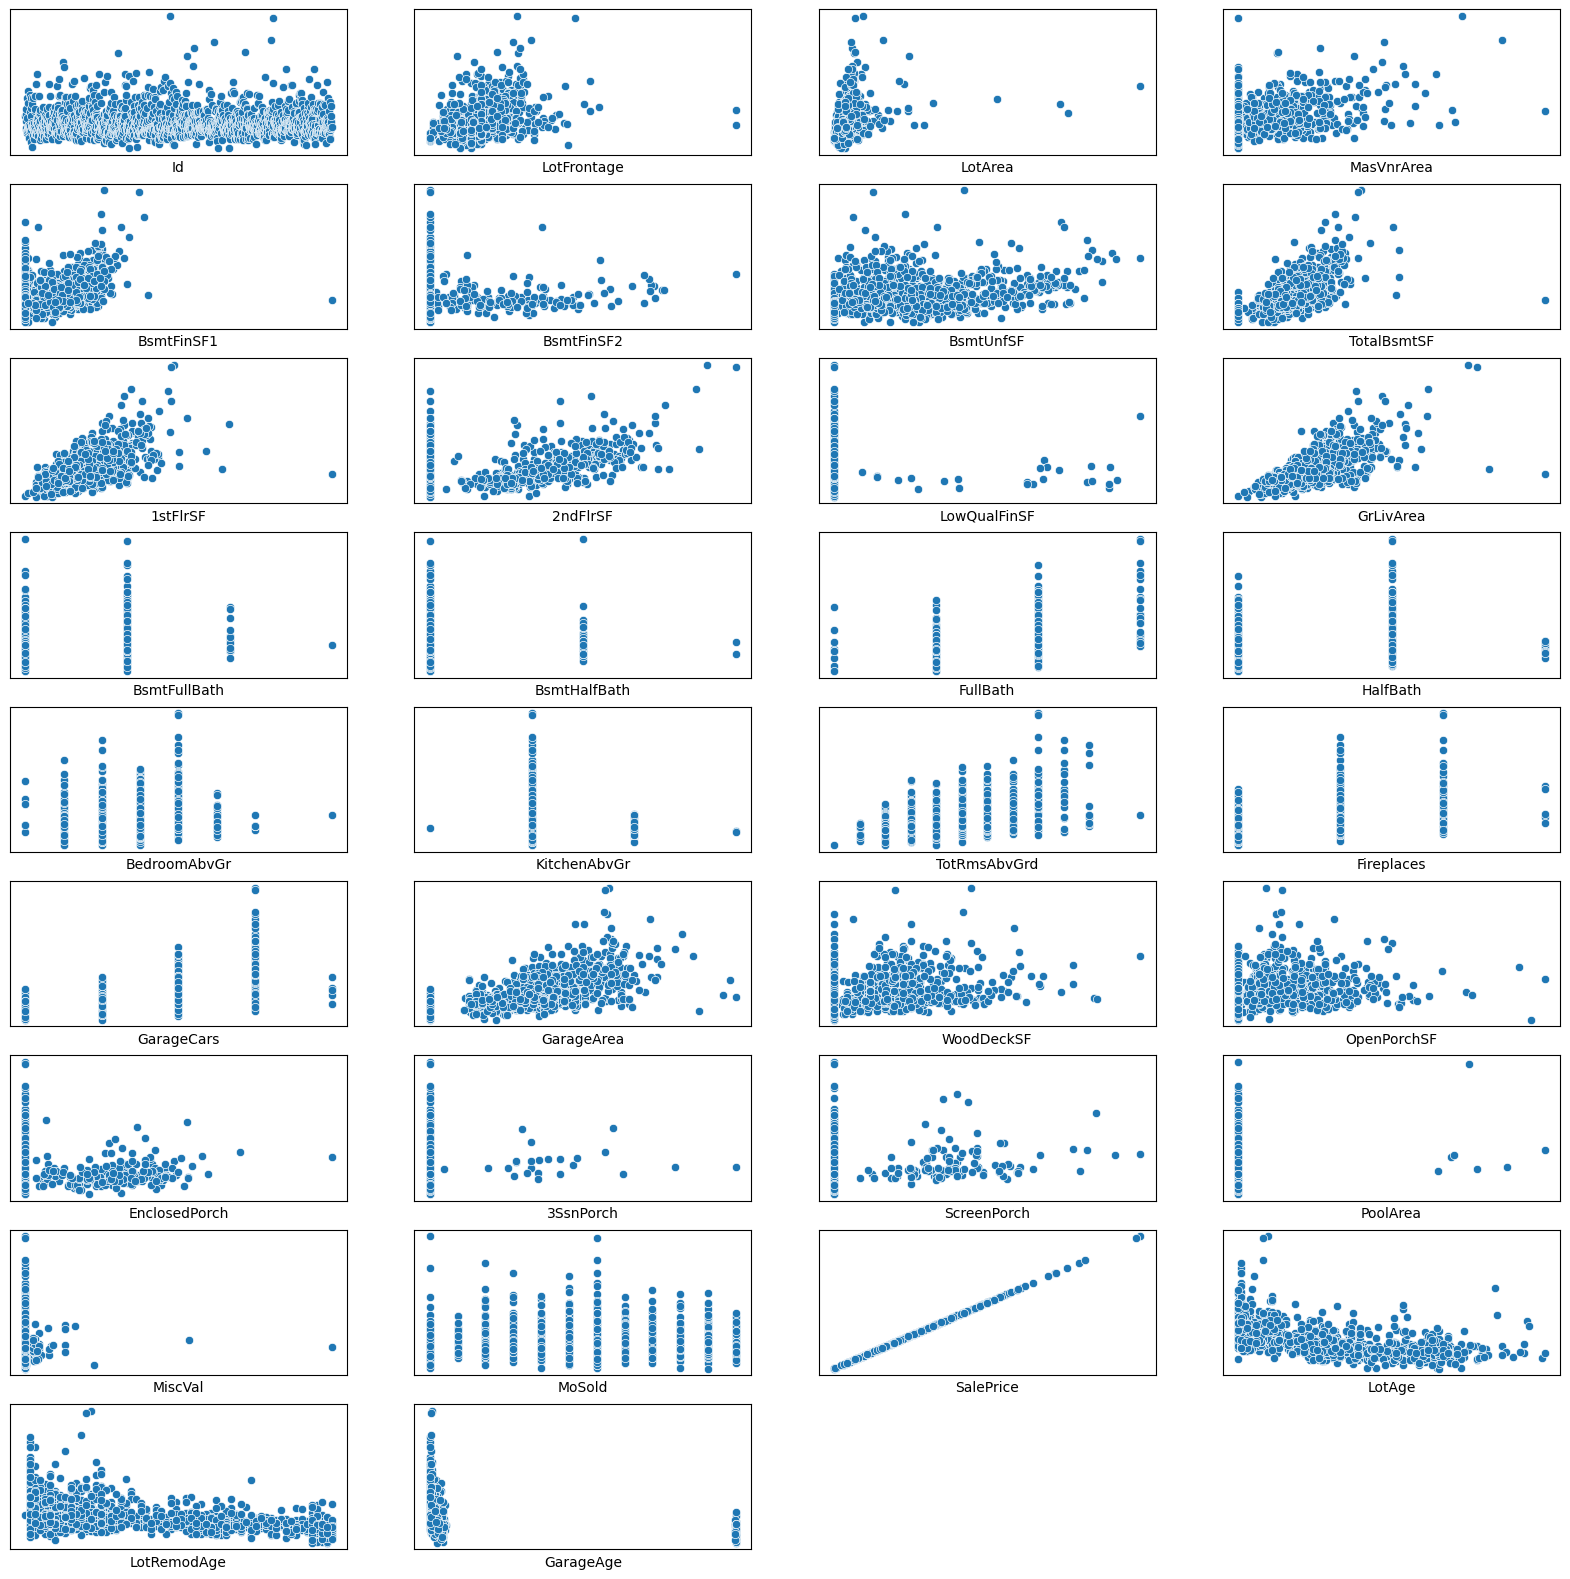

In [38]:
plt.figure(figsize=(20,20))
i=1
for col in transformed_numeric:
    plt.subplot(9,4,i)
    ax=sns.scatterplot(x=col,y = 'SalePrice', data = transformed_numeric)
    #ax.set(title=col)
    plt.xticks([])  
    plt.yticks([]) 
    plt.ylabel("")
    ax.tick_params(left=False, bottom=False)
    i=i+1
    

# 4. Data Preparation 

## 4.1 Drop irrelivant columns

In [39]:
transformed.drop(["Id"],axis=1,inplace=True)

## 4.2 Dummy vairables

In [40]:
transformed_str=transformed.select_dtypes(include=['object'])

In [41]:
##Columns Street and Alley have same values so before creating their dummies we need to modify the values
#Columns LandSlope and Functional have value "Mod" and "Sev: so we will have to change them
#BsmtFinType1 and BsmtFinType2 have all values as common
#So Before creating dummy variables for all string columns add column name to values
for col in transformed_str:
    transformed[col]=transformed[col].map(lambda x:col+"_"+x)

In [42]:
data_with_d = transformed.copy()
for col in transformed_str:
    d=pd.get_dummies(transformed[col], drop_first = True,dtype=int)
    data_with_d = pd.concat([data_with_d, d], axis = 1)
    data_with_d.drop([col], axis = 1, inplace = True)

In [43]:
data_with_d.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450.0,196.0,706,0.0,150,856.0,856.0,854.0,0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600.0,0.0,978,0.0,284,1262.0,1262.0,0.0,0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250.0,162.0,486,0.0,434,920.0,920.0,866.0,0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550.0,0.0,216,0.0,540,756.0,961.0,756.0,0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260.0,350.0,655,0.0,490,1145.0,1145.0,1053.0,0,...,0,0,0,0,1,0,0,0,1,0


## 4.3 Create train and test set

In [44]:
y=data_with_d.pop("SalePrice")
X=data_with_d

In [45]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [46]:
transformed_numeric.drop("SalePrice",axis=1,inplace=True)
transformed_numeric.drop("Id",axis=1,inplace=True)

## 4.4 Scaling the features

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[transformed_numeric.columns] = scaler.fit_transform(X_train[transformed_numeric.columns])
X_test[transformed_numeric.columns] = scaler.transform(X_test[transformed_numeric.columns])

In [48]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
210,0.456282,0.162696,0.000000,0.367347,0.0,0.269755,0.279403,0.164940,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
318,0.794269,0.467605,0.561404,0.774725,0.0,0.245232,0.670909,0.603514,1.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
239,0.235856,0.385345,0.000000,0.073783,0.0,0.436649,0.174840,0.107960,0.603830,0.0,...,0,0,0,0,1,0,0,0,1,0
986,0.338722,0.141830,0.000000,0.000000,0.0,0.330381,0.000000,0.283217,0.555629,0.0,...,0,0,0,0,1,0,0,0,1,0
1416,0.353417,0.569809,0.000000,0.000000,0.0,0.529292,0.208884,0.494734,0.914947,0.0,...,0,0,0,0,1,0,0,0,1,0


In [49]:
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1436,0.353417,0.403728,0.000000,0.483516,0.0,0.168937,0.279403,0.164940,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
57,0.779574,0.591457,0.000000,0.000000,0.0,0.585831,0.276161,0.161487,0.753692,0.0,...,0,0,0,0,1,0,0,0,1,0
780,0.397502,0.323881,0.083333,0.000000,0.0,0.842643,0.581746,0.500777,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0
382,0.632623,0.421117,0.000000,0.000000,0.0,0.639646,0.340196,0.229690,0.751939,0.0,...,0,0,0,0,1,0,0,0,1,0
1170,0.588538,0.466186,0.000000,0.409733,0.0,0.391008,0.467456,0.384227,0.000000,0.0,...,0,0,0,0,1,0,0,0,1,0


# 5. Model building and validation

## 5.1 Using RFE

In [50]:
import statsmodels.api as sm
def createModel(y_train,X_train):
    X_train_rfe = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train_rfe).fit()   
    return lm
def max_p_value(pv):
    maxk = None 
    maxv=0.05
    for key in pv.keys():
        if(key!='const' and maxv<=pv[key]):
            maxk=key
            maxv=pv[key]
    return maxk

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculateVIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif.sort_values(by = "VIF", ascending = False,inplace = True)
    #print(vif)
    return vif
def createModelAndOptimize(y_train,X_train):
    X_train = X_train
    lm = createModel(y_train,X_train)
    #print(lm.summary())
    coltodrop=max_p_value(lm.pvalues)
    print("---------------coltodrop due to PValue----------------",coltodrop)
    #High p-value
    if(coltodrop!=None): 
        X_train.drop(coltodrop, axis = 1, inplace = True)
        lm=createModelAndOptimize(y_train,X_train)
    else:
        vif=calculateVIF(X_train)
        print("---------------coltodrop due to VIF----------------",vif["Features"].iloc[0])
        if(vif["VIF"].iloc[0]>=5):
            X_train.drop(vif["Features"].iloc[0], axis = 1, inplace = True)
            lm=createModelAndOptimize(y_train,X_train)
    return lm    

In [51]:
y_train1=y_train.values.reshape(-1,1)
lm=createModelAndOptimize(y_train1,X_train.copy())

---------------coltodrop due to PValue---------------- BsmtExposure_Mn
---------------coltodrop due to PValue---------------- OverallQual_2
---------------coltodrop due to PValue---------------- Exterior2nd_VinylSd
---------------coltodrop due to PValue---------------- Street_Pave
---------------coltodrop due to PValue---------------- GarageCars
---------------coltodrop due to PValue---------------- BldgType_Twnhs
---------------coltodrop due to PValue---------------- Fireplaces
---------------coltodrop due to PValue---------------- Neighborhood_CollgCr
---------------coltodrop due to PValue---------------- Neighborhood_OldTown
---------------coltodrop due to PValue---------------- ScreenPorch
---------------coltodrop due to PValue---------------- HouseStyle_1Story
---------------coltodrop due to PValue---------------- MSSubClass_80
---------------coltodrop due to PValue---------------- Condition1_RRNe
---------------coltodrop due to PValue---------------- PoolArea
---------------colto

In [52]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     169.6
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        22:58:32   Log-Likelihood:                -11792.
No. Observations:                1021   AIC:                         2.365e+04
Df Residuals:                     987   BIC:                         2.382e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      1.927e+05   3793.135     50.795      0.000    1.85e+05       2e+05
BsmtUnfSF                  2.676e+04   4086.402      6.548      0.000    1.87e+04    3.48e+04
2ndFlrSF                   3.397e+04   2678.887     12.680      0.000    2.87e+04    3.92e+04
WoodDeckSF                 1.588e+04   2710.366      5.857      0.000    1.06e+04    2.12e+04
LotRemodAge               -3.153e+04   2987.649    -10.554      0.000   -3.74e+04   -2.57e+04
MSSubClass_160            -3.232e+04   4462.329     -7.243      0.000   -4.11e+04   -2.36e+04
MSZoning_RM               -2.056e+04   2681.615     -7.668      0.000   -2.58e+04   -1.53e+04
Neighborhood_Crawfor       2.175e+04   4805.191      4.525      0.000    1.23e+04    3.12e+04
Neighborhood_Edwards      -1.348e+04   3379.149     -3.990      0.000   -2.01e+04   -6853.166
Neighborhood_NAmes        -8645.5665   2713.888     -3.186      0.001    -1.4e+04   -3319.913
Neighborhood_NoRidge       3.416e+04   5075.911      6.729      0.000    2.42e+04    4.41e+04
Neighborhood_Somerst       1.213e+04   4001.054      3.033      0.002    4282.025       2e+04
Neighborhood_StoneBr       1.592e+04   7559.332      2.106      0.035    1087.781    3.08e+04
Condition2_PosA            1.195e+05   2.58e+04      4.624      0.000    6.88e+04     1.7e+05
Condition2_PosN           -1.193e+05   2.63e+04     -4.543      0.000   -1.71e+05   -6.78e+04
OverallQual_3             -5.714e+04   7090.490     -8.059      0.000   -7.11e+04   -4.32e+04
OverallQual_4             -4.227e+04   3952.643    -10.694      0.000      -5e+04   -3.45e+04
OverallQual_5             -3.551e+04   2952.846    -12.025      0.000   -4.13e+04   -2.97e+04
OverallQual_6             -2.574e+04   2566.672    -10.027      0.000   -3.08e+04   -2.07e+04
OverallQual_8              3.499e+04   3102.017     11.279      0.000    2.89e+04    4.11e+04
OverallQual_9              7.319e+04   5569.253     13.141      0.000    6.23e+04    8.41e+04
Exterior1st_BrkFace        3.147e+04   5072.833      6.204      0.000    2.15e+04    4.14e+04
Exterior1st_HdBoard       -6549.9936   2411.047     -2.717      0.007   -1.13e+04   -1818.626
MasVnrType_MasVnrTypeNone -1.129e+04   1934.888     -5.834      0.000   -1.51e+04   -7492.030
BsmtQual_Gd               -8755.0670   2090.858     -4.187      0.000   -1.29e+04   -4652.030
BsmtExposure_Gd            3.193e+04   2907.517     10.982      0.000    2.62e+04    3.76e+04
BsmtFinType1_Rec          -9693.9192   3071.671     -3.156      0.002   -1.57e+04   -3666.162
BsmtFinType1_Unf          -2.736e+04   2567.125    -10.657      0.000   -3.24e+04   -2.23e+04
Heating_OthW              -1.041e+05    2.6e+04     -4.010      0.000   -1.55e+05   -5.32e+04
FireplaceQu_Gd             1.491e+04   2276.264      6.550      0.000    1.

In [53]:
# Creating X_test_new dataframe by dropping variables from X_test
l=lm.pvalues.keys().tolist()
l.remove('const')
X_train_new = X_train[l]
X_test_new = X_test[l]



In [54]:
y_pred_train = lm.predict(sm.add_constant(X_train_new))
y_pred_test = lm.predict(sm.add_constant(X_test_new))

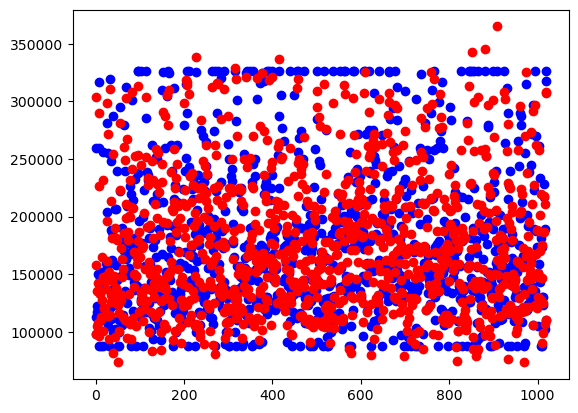

In [55]:
# Visual comparison between predicted and actual values for Training data
plt.scatter(np.arange(0,X_train.shape[0]) , y_train , color = 'blue') # actual values
plt.scatter(np.arange(0,X_train.shape[0]) , y_pred_train , color = 'red' ) # predicted values
plt.show()

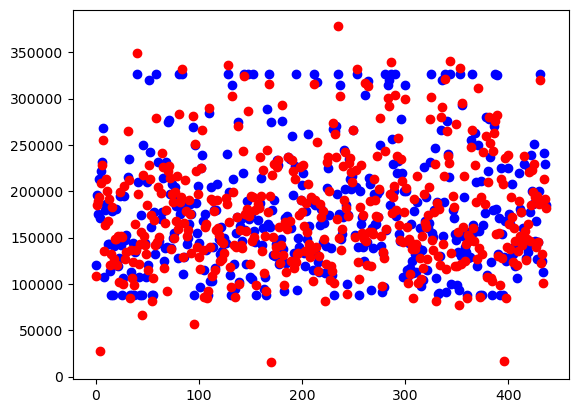

In [56]:
# Visual comparison between predicted and actual values for test data
plt.scatter(np.arange(0,X_test.shape[0]) , y_test , color = 'blue') # actual values
plt.scatter(np.arange(0,X_test.shape[0]) , y_pred_test , color = 'red' ) # predicted values
plt.show()

In [57]:
from sklearn.metrics import r2_score, mean_squared_error

In [58]:
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8501188063554392
0.7302641239895022
643554181234.8839
479917479725.8512
630317513.4523839
1095702008.5065095


Residual analysis

In [59]:
# Residual analysis
y_train_res = y_train - y_pred_train

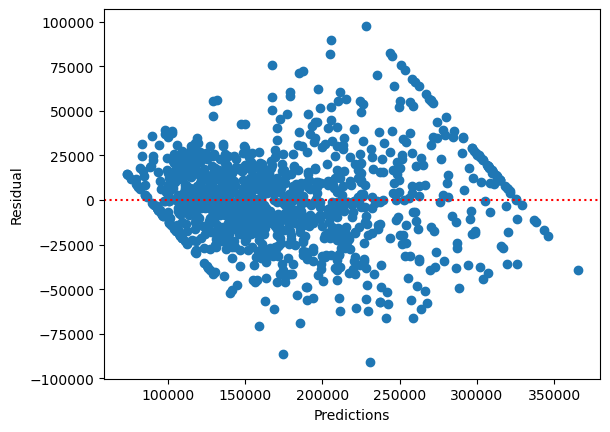

In [60]:
data['res'] = y_train_res
plt.scatter( y_pred_train , y_train_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

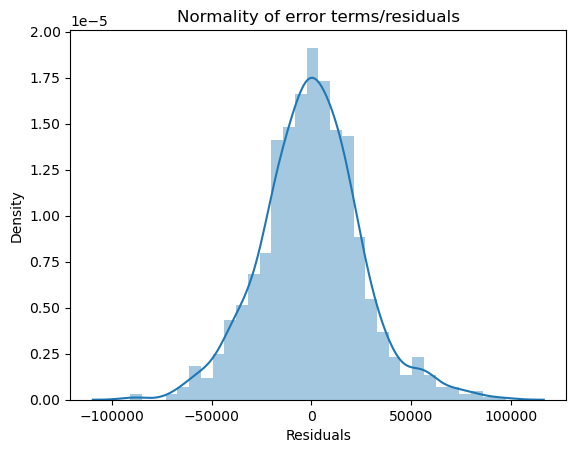

In [61]:
# Distribution of errors
p = sns.distplot(y_train_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

## 5.2 Using Ridge Regression

In [62]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv_r = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv_r.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
# Printing the best hyperparameter alpha
model_cv_r.best_params_

{'alpha': 6.0}

In [64]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
ridge = Ridge(alpha=model_cv_r.best_params_["alpha"])

ridge.fit(X_train, y_train)


Ridge(alpha=6.0)

In [65]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9451243943732086
0.8917768943767187
235622792894.6689
192551917331.191
230776486.6745043
439616249.61459136


## 5.3 Using Lasso

In [66]:
lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
# Printing the best hyperparameter alpha
print(model_cv_l.best_params_)

{'alpha': 50}


In [68]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
lasso = Lasso(alpha=model_cv_l.best_params_["alpha"])
        
lasso.fit(X_train, y_train) 

Lasso(alpha=50)

In [69]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9499926800860544
0.858863393646655
214719532453.75082
251112033816.0758
210303165.96841413
573315145.6988032


## 5.3 Analysis of metric summary


In [70]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.501188e-01,9.451244e-01,9.499927e-01
1,R2 Score (Test),7.302641e-01,8.917769e-01,8.588634e-01
2,RSS (Train),6.435542e+11,2.356228e+11,2.147195e+11
3,RSS (Test),4.799175e+11,1.925519e+11,2.511120e+11
4,MSE (Train),2.510613e+04,1.519133e+04,1.450183e+04
5,MSE (Test),3.310139e+04,2.096703e+04,2.394400e+04


- Linear regression has worst Train and Test score.
- Difference bet Train and Test R2 is high which tells that model might be overfitting Training data.
- Ridge and Lasso regression have similar Train and Test score.

## 5.4 Analyzing changes in the coefficients 

In [71]:
## Lets observe the changes in the coefficients after regularization

In [72]:
betas = pd.DataFrame(index=X_train.columns)

In [73]:
#p=lm.params.drop("const",axis=0)

In [74]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [75]:
pd.set_option('display.max_rows', None)

In [76]:
betas['Linear'].fillna(0,inplace=True)

In [77]:
betas.sort_values(by='Lasso',ascending=False).head(10)

,Linear,Ridge,Lasso
GrLivArea,0.000000,38349.068744,67268.550081
OverallQual_9,73186.380228,28485.435502,44401.877608
OverallCond_9,0.000000,19391.580895,36381.049985
TotalBsmtSF,0.000000,24623.231793,31590.348356
OverallQual_8,34989.060376,19310.383509,28847.927044
GarageArea,0.000000,16875.900001,21836.340407
Neighborhood_Crawfor,21745.531384,15867.673212,19801.946376
Exterior1st_BrkFace,31473.791045,12480.728480,17260.699393
LotArea,0.000000,14996.949222,16722.977557
Condition2_PosA,119488.853930,11159.245136,16393.733500


In [78]:
betas.sort_values(by='Lasso',ascending=False)["Lasso"].head(5).index

Index(['GrLivArea', 'OverallQual_9', 'OverallCond_9', 'TotalBsmtSF',
       'OverallQual_8'],
      dtype='object')

'GrLivArea','OverallQual_9','OverallCond_9','TotalBsmtSF','OverallQual_8'

In [79]:
X_train.shape

(1021, 286)

In [80]:
X_train_top5_dropped=X_train.drop(betas.sort_values(by='Lasso',ascending=False)["Lasso"].head(5).index,inplace=False,axis=1)
X_testtop5_dropped=X_test.drop(betas.sort_values(by='Lasso',ascending=False)["Lasso"].head(5).index,inplace=False,axis=1)

In [81]:
X_train_top5_dropped.shape

(1021, 281)

In [82]:
lasso_top5_dropped = Lasso()

# cross validation
model_cv_l_top5_dropped = GridSearchCV(estimator = lasso_top5_dropped, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)      

model_cv_l_top5_dropped.fit(X_train_top5_dropped, y_train) 



Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [83]:
# Printing the best hyperparameter alpha
print(model_cv_l_top5_dropped.best_params_)

{'alpha': 50}


In [84]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
lasso_top5_dropped = Lasso(alpha=model_cv_l_top5_dropped.best_params_["alpha"])
        
lasso_top5_dropped.fit(X_train_top5_dropped, y_train) 

Lasso(alpha=50)

In [85]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso_top5_dropped.predict(X_train_top5_dropped)
y_pred_test = lasso_top5_dropped.predict(X_testtop5_dropped)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9449736651662495
0.8518924262023428
236269988243.29175
263514867197.4055
231410370.46355706
601632116.8890536


In [86]:
betas_top5_dropped = pd.DataFrame(index=X_train_top5_dropped.columns)

In [87]:
betas_top5_dropped['Lasso'] = lasso_top5_dropped.coef_

In [88]:
betas_top5_dropped.head(5)

,Lasso
LotFrontage,2131.026436
LotArea,18315.277273
MasVnrArea,6409.931597
BsmtFinSF1,28184.258428
BsmtFinSF2,7401.424723
